## Import necessary libraries

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler



import warnings
warnings.filterwarnings('ignore')

## Load & Explore data

In [3]:
data=pd.read_csv('D:/Projects/CodeSoft/Data Science Internship/sales Analysis/advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# To show basic info about datatype
data.info()
shape = data.shape
print(f'\n Number of Rows = {shape[0]}\n Number of columns = {shape[1]} ')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB

 Number of Rows = 200
 Number of columns = 4 


In [5]:
# To display stats about the data
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
# Check for null values 
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

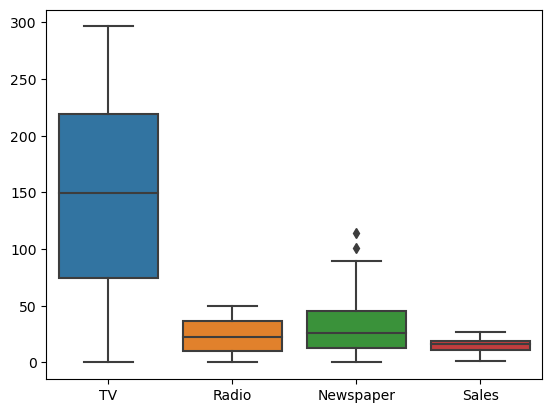

In [30]:
sns.boxplot(data=data,fliersize=5)
plt.show()

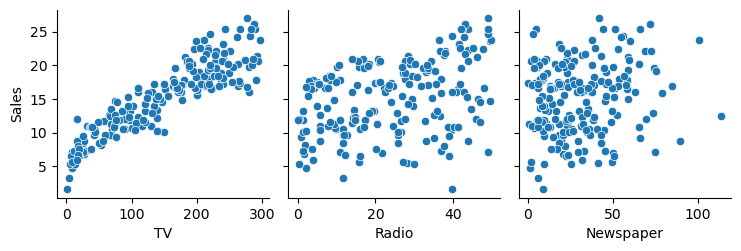

In [7]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales', kind='scatter')
plt.show()

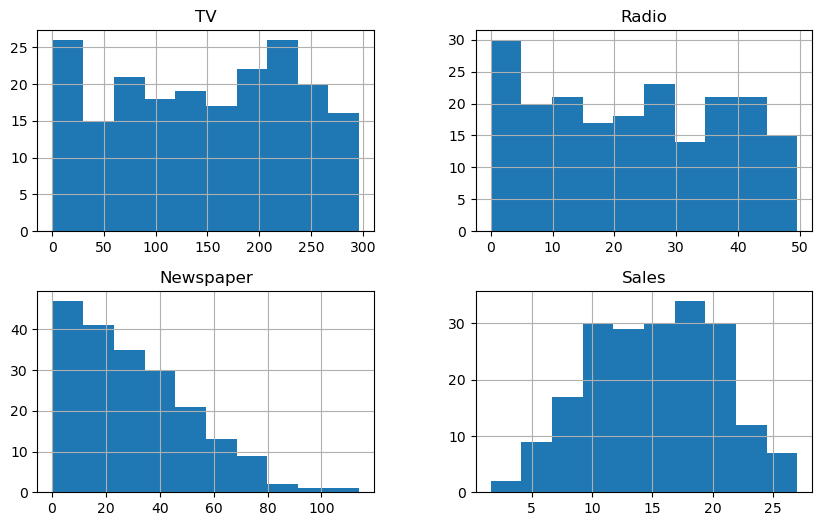

In [16]:
data.hist(bins=10,figsize=(10,6))
plt.show()

## Coorelation Matrix

In [20]:
corr = data.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


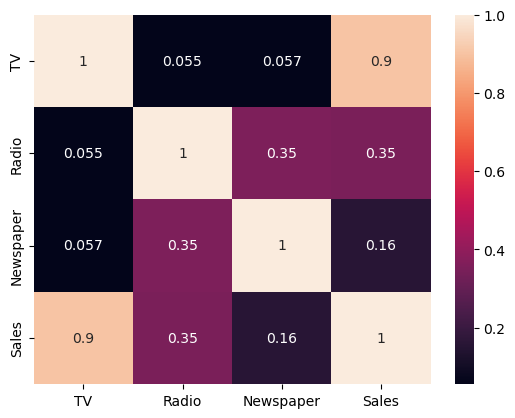

In [25]:
sns.heatmap(corr, annot=True )
plt.show()

## Model Training

In [266]:
x = data[['TV']]
y = data['Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

In [267]:
# Training the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [268]:
# print matric to get performance
print('Accuracy: ', model.score(x_test, y_test)*100,'%')

Accuracy:  82.63198943524709 %


In [269]:
# Add a constant to get an intercept and Fit the resgression using 'OLS'
x_tr_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_tr_sm).fit()

In [270]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.845670
TV       0.056504
dtype: float64

In [271]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     573.8
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           5.21e-51
Time:                        02:05:09   Log-Likelihood:                -320.39
No. Observations:                 140   AIC:                             644.8
Df Residuals:                     138   BIC:                             650.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8457      0.394     17.354      0.000       6.066       7.626
TV             0.0565      0.002     23.954      0.000       0.052       0.061
==============================================================================
Omnibus:                        0.749   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.687   Jarque-Bera (JB):                0.723
Skew:                          -0.172   Prob(JB):                        0.697
Kurtosis:                       2.921   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

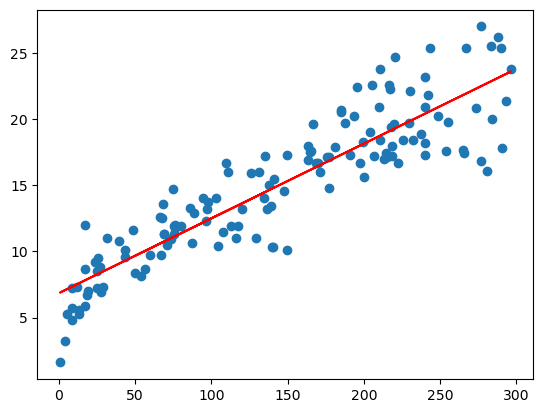

In [275]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.8457 + 0.0565*x_train, 'r')
plt.show()

In [272]:
res = model.predict(x_test)
res

array([ 7.94183965, 13.65435285,  8.99280647,  9.37138054, 17.45704462,
       13.68260465, 19.50247467, 10.09462652, 20.90376377, 13.04976441,
       23.00569741, 12.25306376, 20.25962281, 18.28764743, 18.0842345 ,
       20.30482569, 15.40596422, 19.72848904, 11.16254442,  8.93065252,
       15.69413254, 14.92003332, 21.6891637 , 20.09576239, 17.16322594,
       21.02242131, 19.41206893, 22.74578088,  7.25814618, 18.90918695,
       21.70046442, 12.15135729, 23.43512471, 17.79041582, 18.13508773,
       12.51863064,  9.00410719, 14.71097003, 19.3047121 , 10.36584377,
       14.28719309, 20.36697964,  7.85708426, 16.739449  , 19.74544012,
        9.36007982, 17.49094678, 19.68328617, 16.59253966,  7.28639798,
       13.80126219, 11.95359472, 18.53626324, 18.01077983, 11.26425089,
       11.9140422 ,  7.95314037, 22.67797657, 21.61005867, 11.08908975])

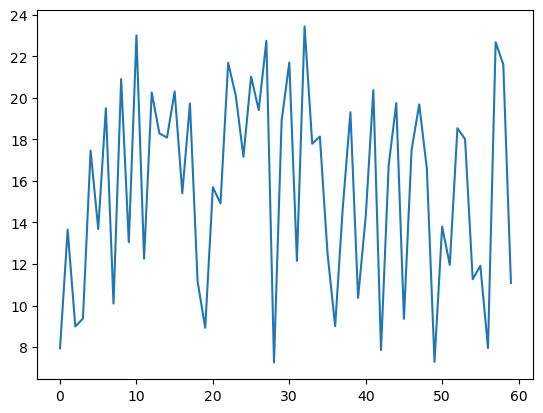

In [276]:
plt.plot(res)
plt.show()